# Housing prices in Boston : linear regression with OpenTURNS

In this document, we show how to create a linear regression model with OpenTURNS on the Boston dataset.

This dataset contains information collected by various sources concerning housing in the area of Boston Mass in 1970. The sources are the U.S Census Service, FBI and other sources. The dataset contains 506 cases. 

There are 14 variables:
* CRIM : per capita crime rate by town
* ZN : proportion of residential land zoned for lots over 25,000 sq.ft. (high value restricts construction of small lot houses)
* INDUS : proportion of non retail business acres per town (measures the impact of noise, heavy traffic and visual effects)
* CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise). Captures the amenities of a riverside location.
* NOX : nitric oxides concentration (parts per 10 million) (measures air pollution)
* RM : average number of rooms per dwelling (measures the spaciousness)
* AGE : proportion of owner occupied units built prior to 1940 (related to structure quality)
* DIS : weighted distances to five Boston employment centres
* RAD : index of accessibility to radial highways
* TAX : full value property tax rate per 10,000 US Dollars (measures the cost of public services)
* PTRATIO : pupil teacher ratio by town (measures public sector benefits in each town)
* B : $1000(Bk - 0.63)^2$ US Dollars where Bk is the proportion of blacks by town
* LSTAT : percent lower status of the population (proportion of adults without some high school education and proportion of male workers classified as laborers)
* MEDV : median value of owner occupied homes in 1,000 US Dollars

The classical goal is to predict MEDV depending on the first 13 variables.

## Reference

* Regression Analysis with Python, Luca Massaron, Alberto Boschetti, Packt Publishing
* Harrison, Jr., David, Rubinfeld, Daniel L. (1978/03)."Hedonic housing prices and the demand for clean air." Journal of Environmental Economics and Management 5(1): 81-102. 
* Belsley, Kuh & Welsch, "Regression diagnostics: Identifying Influential Data and Sources of Collinearity", Wiley, 1980. 244-261.
* Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [1]:
import openturns as ot

In [2]:
sample = ot.Sample_ImportFromCSVFile("Housing-prices-Boston.csv")

In [3]:
dim = sample.getDimension()
dim

14

In [4]:
n = sample.getSize()
n

506

In [5]:
sample.getDescription()

[CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV]

Extract the inputs and the output (MEDV).

In [6]:
X = sample[:,0:dim-1]
X[0:5,:]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=13 description=[CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT] data=[[0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98],[0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14],[0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03],[0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94],[0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33]]

In [7]:
Y = sample[:,dim-1]
Y[0:10]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=10 dimension=1 description=[MEDV] data=[[24],[21.6],[34.7],[33.4],[36.2],[28.7],[22.9],[27.1],[16.5],[18.9]]

The `LinearLeastSquares` create a linear model based on least squares. A constant is automatically included into the model (i.e. a column of ones is automatically added to the design matrix X). 

In [8]:
myLeastSquares = ot.LinearLeastSquares(X, Y)

This solves the least squares equation. The solver uses the `solveLinearSystem` of the Matrix class, so that the resolution is based on LAPACK’s DGELSY. This implies that an orthogonal decomposition of the design matrix is done. 

In [9]:
myLeastSquares.run()

In [10]:
myLeastSquares.getConstant()

class=Point name=Unnamed dimension=1 values=[36.4911]

In [11]:
myLeastSquares.getLinear()

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=13 columns=1 values=[-0.107171,0.0463952,0.0208602,2.68856,-17.7958,3.80475,0.000751062,-1.47576,0.305655,-0.0123293,-0.953464,0.00939251,-0.525467]

In [12]:
linearmodel = myLeastSquares.getResponseSurface()

In [13]:
ypredicted = linearmodel(X)

In order to validate the linear model, we use the `MetaModelValidation` class.

In [14]:
val = ot.MetaModelValidation(X, Y, linearmodel)

For a linear regression model, the predictivity factor is the R2.

In [15]:
val.computePredictivityFactor()

0.7406077428649431

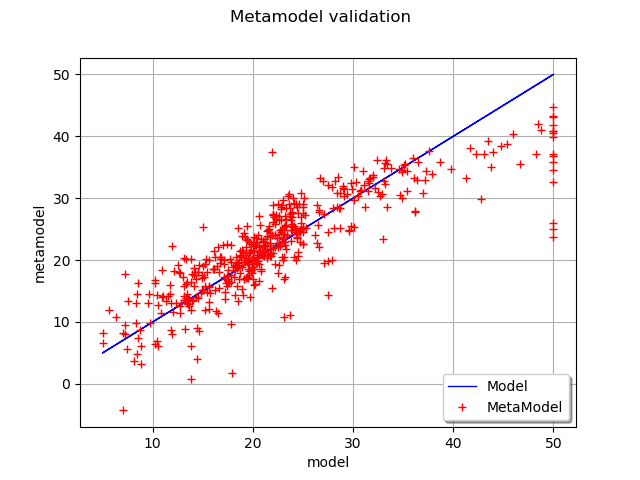

In [16]:
val.drawValidation()